In [186]:
# Импорт необходимых библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [187]:
train = pd.read_csv('train.csv')  # загрузим train.csv
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9688028 entries, 0 to 9688027
Data columns (total 10 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   row_id                          int64  
 1   timestamp                       float64
 2   user_id                         float64
 3   content_id                      float64
 4   content_type_id                 float64
 5   task_container_id               float64
 6   user_answer                     float64
 7   answered_correctly              float64
 8   prior_question_elapsed_time     float64
 9   prior_question_had_explanation  object 
dtypes: float64(8), int64(1), object(1)
memory usage: 739.1+ MB


In [188]:
train.shape  # посмотрим на структуру датасета

(9688028, 10)

In [189]:
train.isna().sum()  # посмотрим на количество пропущенных значений

row_id                                 0
timestamp                              1
user_id                                1
content_id                             1
content_type_id                        1
task_container_id                      1
user_answer                            1
answered_correctly                     1
prior_question_elapsed_time       227961
prior_question_had_explanation     38277
dtype: int64

In [190]:
train.head()

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation
0,0,0.0,115.0,5692.0,0.0,1.0,3.0,1.0,NaN,NaN
1,1,56943.0,115.0,5716.0,0.0,2.0,2.0,1.0,37000.0,False
2,2,118363.0,115.0,128.0,0.0,0.0,0.0,1.0,55000.0,False
3,3,131167.0,115.0,7860.0,0.0,3.0,0.0,1.0,19000.0,False
4,4,137965.0,115.0,7922.0,0.0,4.0,1.0,1.0,11000.0,False


In [191]:
train['prior_question_had_explanation'] = train['prior_question_had_explanation'].astype('boolean')

Датасет train.csv занимает много памяти и содержит 9688028 строк, вследствие чего локальной машине не хватает ресурсов обработать все строки данных. В связи с этим выберем случайную выборку из датасета c помощью pandas.DataFrame.sample. 

In [192]:
random_data = train.sample(frac=0.2, random_state=42)  # получение 20% репрезентативной выборки из исходного train.csv

In [193]:
# Получим описательные статистики для исходного и "рандомного" датасета
original_stats = train.describe()
sample_stats = random_data.describe()

print(original_stats)

             row_id     timestamp       user_id    content_id  \
count  9.688028e+06  9.688027e+06  9.688027e+06  9.688027e+06   
mean   4.844014e+06  7.565285e+09  1.045865e+08  5.214292e+03   
std    2.796693e+06  1.144758e+10  6.114576e+07  3.868457e+03   
min    0.000000e+00  0.000000e+00  1.150000e+02  0.000000e+00   
25%    2.422007e+06  5.080255e+08  5.184520e+07  2.063000e+03   
50%    4.844014e+06  2.598177e+09  1.036970e+08  5.029000e+03   
75%    7.266020e+06  9.795262e+09  1.575179e+08  7.404000e+03   
max    9.688027e+06  8.470816e+10  2.107605e+08  3.273600e+04   

       content_type_id  task_container_id   user_answer  answered_correctly  \
count     9.688027e+06       9.688027e+06  9.688027e+06        9.688027e+06   
mean      1.957922e-02       8.749819e+02  1.376385e+00        6.256266e-01   
std       1.385492e-01       1.338880e+03  1.193702e+00        5.228541e-01   
min       0.000000e+00       0.000000e+00 -1.000000e+00       -1.000000e+00   
25%       0.000000e

In [194]:
print(sample_stats)

             row_id     timestamp       user_id    content_id  \
count  1.937606e+06  1.937606e+06  1.937606e+06  1.937606e+06   
mean   4.842602e+06  7.563597e+09  1.045564e+08  5.215242e+03   
std    2.797283e+06  1.145683e+10  6.115863e+07  3.862690e+03   
min    0.000000e+00  0.000000e+00  1.150000e+02  0.000000e+00   
25%    2.417448e+06  5.076935e+08  5.175673e+07  2.063000e+03   
50%    4.840904e+06  2.597348e+09  1.035792e+08  5.030000e+03   
75%    7.266296e+06  9.771750e+09  1.575260e+08  7.404000e+03   
max    9.688025e+06  8.470780e+10  2.107605e+08  3.273600e+04   

       content_type_id  task_container_id   user_answer  answered_correctly  \
count     1.937606e+06       1.937606e+06  1.937606e+06        1.937606e+06   
mean      1.959996e-02       8.750645e+02  1.377774e+00        6.256938e-01   
std       1.386211e-01       1.338963e+03  1.194153e+00        5.228777e-01   
min       0.000000e+00       0.000000e+00 -1.000000e+00       -1.000000e+00   
25%       0.000000e

Как видно из описательных статистик, такие статистики как среднее, стандартное отклонение и соответствующие процентили равны друг другу, а значит созданный семпл является репрезентативным (является репрезентативной выборкой) и подходит для дальнейшего анализа в условиях ограниченности ресурсов.

In [195]:
train = random_data.copy()

## Изучение train.csv

* row_id: (int64) Идентификационный код строки.

* timestamp: (int64) время в миллисекундах между этим взаимодействием пользователя и первым завершением события от этого пользователя.

* user_id: (int32) Идентификационный код пользователя.

* content_id: (int16) Идентификационный код взаимодействия пользователя

* content_type_id: (int8) 0, если событие было вопросом, заданным пользователю, 1, если событием был просмотр пользователем лекции.

* task_container_id: (int16) Идентификационный код для пакета вопросов или лекций. Например, пользователь может увидеть три вопроса подряд, прежде чем увидеть объяснения для любого из них. Все эти три вопроса будут иметь общий task_container_id.
user_answer: (int8) ответ пользователя на вопрос, если таковой имеется. Читать -1 как null, для лекций.
* answers_correctly: (int8) если пользователь ответил правильно. Читать -1 как null, для лекций.

* prior_question_elapsed_time: (float32) Среднее время в миллисекундах, которое потребовалось пользователю для ответа на каждый вопрос в предыдущем пакете вопросов, игнорируя любые лекции между ними. Имеет значение null для первого пакета вопросов или лекции пользователя. Обратите внимание, что время — это среднее время, которое потребовалось пользователю для решения каждого вопроса в предыдущем пакете.

* prior_question_had_explanation: (bool) Увидел ли пользователь объяснение и правильный ответ(ы) после ответа на предыдущий пакет вопросов, игнорируя любые лекции между ними. Значение является общим для одного пакета вопросов и имеет значение null для первого пакета вопросов или лекции пользователя. Обычно первые несколько вопросов, которые видит пользователь, были частью диагностического теста при вступлении, в ходе которого он не получал никакой обратной связи.

In [196]:
train.head()

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation
7937388,7937388,9.196995e+09,172528720.0,4114.0,0.0,5905.0,2.0,1.0,20000.0,True
9579837,9579837,3.110952e+06,208966712.0,3364.0,0.0,33.0,2.0,0.0,5000.0,True
2146933,2146933,1.051362e+10,45025325.0,4414.0,0.0,767.0,3.0,1.0,8000.0,True
9600358,9600358,2.228586e+10,209299080.0,11111.0,0.0,269.0,3.0,1.0,56000.0,True
8543915,8543915,3.949711e+09,185159383.0,3172.0,0.0,936.0,0.0,0.0,23000.0,True


In [197]:
train.info()  # смотрим информацию о датасете

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1937606 entries, 7937388 to 7425082
Data columns (total 10 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   row_id                          int64  
 1   timestamp                       float64
 2   user_id                         float64
 3   content_id                      float64
 4   content_type_id                 float64
 5   task_container_id               float64
 6   user_answer                     float64
 7   answered_correctly              float64
 8   prior_question_elapsed_time     float64
 9   prior_question_had_explanation  boolean
dtypes: boolean(1), float64(8), int64(1)
memory usage: 151.5 MB


In [198]:
train.isna().sum()  # изучим количество пропусков

row_id                                0
timestamp                             0
user_id                               0
content_id                            0
content_type_id                       0
task_container_id                     0
user_answer                           0
answered_correctly                    0
prior_question_elapsed_time       45635
prior_question_had_explanation     7658
dtype: int64

In [199]:
# Подсчет пропущенных значений по каждому столбцу
def analyze_missing_val(df):
    # Подсчет пропущенных значений по каждому столбцу
    missing_count = df.isnull().sum()
    
    # Подсчет процента пропущенных значений
    missing_percentage = round((missing_count / len(df)) * 100, 2)
    
    # Создание нового датафрейма
    missing_df = pd.DataFrame({
        'Столбцы': missing_count.index,
        'Количество пропущенных строк': missing_count.values,
        '% пропущенных значений': missing_percentage.values
    })
    
    # Фильтрация только тех столбцов, где есть пропуски
    missing_df = missing_df[missing_df['Количество пропущенных строк'] > 0].reset_index(drop=True)
    
    return missing_df

missing_data = analyze_missing_val(train)
missing_data

,Столбцы,Количество пропущенных строк,% пропущенных значений
0,prior_question_elapsed_time,45635,2.36
1,prior_question_had_explanation,7658,0.40


In [200]:
train.prior_question_had_explanation.value_counts()

True     1716141
False     213807
Name: prior_question_had_explanation, dtype: Int64

Как видно из таблицы, процент пропущенных значений в столбцах prior_question_elapsed_time и prior_question_had_explanation составляет соответственно 2.36% и 0.40%. Заполним в prior_question_elapsed_time пропуски медианным значением, так как это числовая колонка, и время сильно варьируется. А также преобразуем булевые значения в числовые (True=1, False=0), заполним пропуски значением 0 (нет объяснения).

In [201]:
# Обработка пропусков в данных train
train['prior_question_elapsed_time'].fillna(train['prior_question_elapsed_time'].median(), inplace=True)
train['prior_question_had_explanation'] = train['prior_question_had_explanation'].map({True: 1, False: 0})
train['prior_question_had_explanation'].fillna(0, inplace=True)

# Проверим, остались ли пропуски в данных
missing_values_after_processing = train.isnull().sum()
missing_values_after_processing


row_id                            0
timestamp                         0
user_id                           0
content_id                        0
content_type_id                   0
task_container_id                 0
user_answer                       0
answered_correctly                0
prior_question_elapsed_time       0
prior_question_had_explanation    0
dtype: int64

In [202]:
train.prior_question_had_explanation.value_counts()  # посмотрим на количество уникальных значений для `prior_question_had_explanation`

1.0    1716141
0.0     221465
Name: prior_question_had_explanation, dtype: int64

Итак, пропуски обработанны корректно. Можно продолжать анализ данных

In [203]:
train['prior_question_had_explanation'] = train['prior_question_had_explanation'].astype(bool)  # преобразование `prior_question_had_explanation` обратно в булев тип данных
train.dtypes['prior_question_had_explanation']


dtype('bool')

In [204]:
train.prior_question_had_explanation.value_counts()

True     1716141
False     221465
Name: prior_question_had_explanation, dtype: int64

In [205]:
# Описание основных статистических характеристик числовых признаков
numerical_description = train.describe()

# Описание категориальных и булевых признаков
categorical_description = train.describe(include=['object', 'bool'])

# Анализ уникальных значений в каждом признаке
unique_values = {col: train[col].nunique() for col in train.columns}

# Анализ распределения значений в некоторых ключевых признаках
answered_correctly_distribution = train['answered_correctly'].value_counts(normalize=True)  # answered_correctly - чтобы понять успешность ответов
user_answer_distribution = train['user_answer'].value_counts(normalize=True)  # user_answer - чтобы понять частоту различных ответов
prior_question_had_explanation_distribution = train['prior_question_had_explanation'].value_counts(normalize=True)  # prior_question_had_explanation - для понимания частоты наличия объяснения

print(numerical_description, categorical_description, unique_values, answered_correctly_distribution, user_answer_distribution, prior_question_had_explanation_distribution)

             row_id     timestamp       user_id    content_id  \
count  1.937606e+06  1.937606e+06  1.937606e+06  1.937606e+06   
mean   4.842602e+06  7.563597e+09  1.045564e+08  5.215242e+03   
std    2.797283e+06  1.145683e+10  6.115863e+07  3.862690e+03   
min    0.000000e+00  0.000000e+00  1.150000e+02  0.000000e+00   
25%    2.417448e+06  5.076935e+08  5.175673e+07  2.063000e+03   
50%    4.840904e+06  2.597348e+09  1.035792e+08  5.030000e+03   
75%    7.266296e+06  9.771750e+09  1.575260e+08  7.404000e+03   
max    9.688025e+06  8.470780e+10  2.107605e+08  3.273600e+04   

       content_type_id  task_container_id   user_answer  answered_correctly  \
count     1.937606e+06       1.937606e+06  1.937606e+06        1.937606e+06   
mean      1.959996e-02       8.750645e+02  1.377774e+00        6.256938e-01   
std       1.386211e-01       1.338963e+03  1.194153e+00        5.228777e-01   
min       0.000000e+00       0.000000e+00 -1.000000e+00       -1.000000e+00   
25%       0.000000e

### Сделаем выводы из описательных статистик и анализа уникательных значений.

1. Основные характеристики по user_id и content_id:

* Средние значения user_id и content_id соответственно составляют ~104,556,444 и 5,215, что свидетельствует о значительном количестве уникальных пользователей и контента.
* Диапазон user_id варьируется от 115 до 210,760,499, а content_id — от 0 до 32,736. Это указывает на большую активность пользователей на платформе и разнообразие контента, представленного пользователям.

2. Тип контента (content_type_id):

* Большинство записей связано с вопросами (content_type_id = 0), так как только 1.96% данных связаны с лекциями (content_type_id = 1).

3. task_container_id:

* Среднее значение task_container_id составляет 875, с диапазоном от 0 до 9999. Это указывает на большое количество наборов вопросов или лекций, которые студенты проходят, что предполагает структурированность учебного процесса.

4. Анализ ответов студентов:

* user_answer: Частота ответов почти равномерно распределена среди значений 0-3, что может указывать на то, что студенты выбирают разные варианты ответов почти с одинаковой частотой.
* answered_correctly: 64.5% ответов являются правильными, 33.5% — ошибочными, и 1.96% данных связаны с лекциями (отмечены как -1). Это говорит о средней успеваемости студентов, которая находится на уровне чуть выше 60%.

5. prior_question_had_explanation:

* Этот признак содержит два уникальных значения, True и False:
88.6% значений — True, что означает, что большинство студентов видят объяснения к предыдущим вопросам.
11.4% значений — False, что позволяет провести анализ влияния объяснений на успеваемость.

6. Выбросы и распределение данных:

* По prior_question_elapsed_time выявлены выбросы: время выполнения варьируется от 0 до 300,000 мс, что существенно превышает среднее и медианное значения.
* В task_container_id и content_id есть широкий диапазон значений, что указывает на большое разнообразие заданий и контента в базе данных.

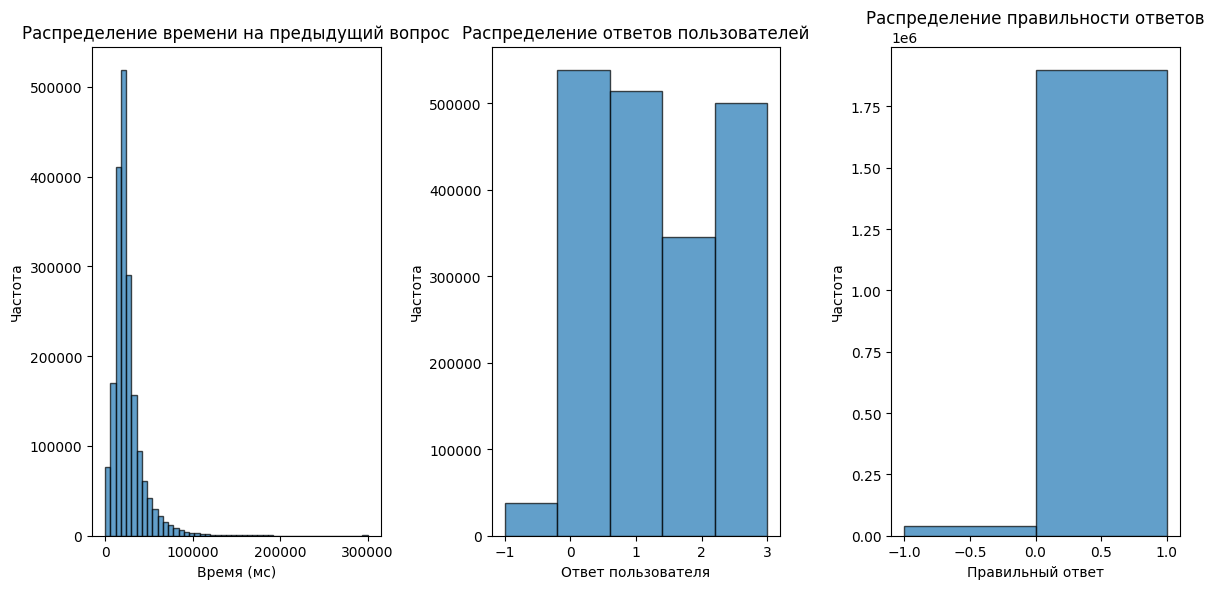

In [208]:
# Построим графики распределения для ключевых числовых столбцов
plt.figure(figsize=(12, 6))

# График распределения времени на предыдущий вопрос
plt.subplot(1, 3, 1)
plt.hist(train['prior_question_elapsed_time'], bins=50, edgecolor='k', alpha=0.7)
plt.title('Распределение времени на предыдущий вопрос')
plt.xlabel('Время (мс)')
plt.ylabel('Частота')

# График распределения ответов пользователей
plt.subplot(1, 3, 2)
plt.hist(train['user_answer'], bins=5, edgecolor='k', alpha=0.7)
plt.title('Распределение ответов пользователей')
plt.xlabel('Ответ пользователя')
plt.ylabel('Частота')

# График распределения правильности ответов
plt.subplot(1, 3, 3)
plt.hist(train['answered_correctly'], bins=2, edgecolor='k', alpha=0.7)
plt.title('Распределение правильности ответов')
plt.xlabel('Правильный ответ')
plt.ylabel('Частота')

# Выравниваем графики для наглядности и отображаем их
plt.tight_layout()
plt.show()


Проанализируем полученные графики.
Prior Question Elapsed Time: Большинство значений распределено в диапазоне до 60,000 миллисекунд, с пиковой частотой на низких значениях времени.
User Answer: Распределение ответов пользователей примерно равномерное по всем возможным значениям (0, 1, 2, 3).
Answered Correctly: Правильных ответов значительно больше, чем неправильных.

In [115]:
# Преобразуем `timestamp` в формат to_datetime в ms
train['timestamp'] = pd.to_datetime(train['timestamp'], unit='ms')
print(train['timestamp'].min())
print(train['timestamp'].max())

1970-01-01 00:00:00
1972-09-07 09:56:37.533000


## Изучение questions.csv и lectures.csv

questions.csv:

* question_id: внешний ключ для столбца content_id обучения/тестирования, когда тип контента — вопрос (0).
* bundle_id: код, для которого вопросы обслуживаются вместе.
* correct_answer: ответ на вопрос. Можно сравнить со столбцом user_answer обучения, чтобы проверить, был ли пользователь прав.
* part: соответствующий раздел теста TOEIC.
* tags: один или несколько подробных кодов тегов для вопроса. Значение тегов не будет предоставлено, но этих кодов достаточно для кластеризации вопросов вместе.

lectures.csv:

* lecture_id: внешний ключ для столбца content_id обучения/теста, когда тип контента — лекция (1).
* part: код категории верхнего уровня для лекции.
* tag: один код тега для лекции. Значение тегов не будет предоставлено, но этих кодов достаточно для кластеризации лекций вместе.
* type_of: краткое описание основной цели лекции.

In [116]:
# Загружаем метаданные
questions = pd.read_csv('questions.csv')
lectures = pd.read_csv('lectures.csv')

In [117]:
# Отобразим основную информацию
questions_info = questions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13523 entries, 0 to 13522
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   question_id     13523 non-null  int64 
 1   bundle_id       13523 non-null  int64 
 2   correct_answer  13523 non-null  int64 
 3   part            13523 non-null  int64 
 4   tags            13522 non-null  object
dtypes: int64(4), object(1)
memory usage: 528.4+ KB


In [118]:
# Отобразим основную информацию
lectures_info = lectures.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   lecture_id  418 non-null    int64 
 1   tag         418 non-null    int64 
 2   part        418 non-null    int64 
 3   type_of     418 non-null    object
dtypes: int64(3), object(1)
memory usage: 13.2+ KB


Пропуски в данных датасетах отсутствуют.

In [119]:
# Отобразим первые 5 строок датасета
questions.head()

,question_id,bundle_id,correct_answer,part,tags
0,0,0,0,1,51 131 162 38
1,1,1,1,1,131 36 81
2,2,2,0,1,131 101 162 92
3,3,3,0,1,131 149 162 29
4,4,4,3,1,131 5 162 38


In [120]:
# Отобразим первые 5 строок датасета
lectures.head()

,lecture_id,tag,part,type_of
0,89,159,5,concept
1,100,70,1,concept
2,185,45,6,concept
3,192,79,5,solving question
4,317,156,5,solving question


## Cлияние train.csv с questions.csv и lectures.csv

In [138]:
# Объединим основные данные с вопросами, где content_type_id равен 0
data_questions = train[train['content_type_id'] == 0].merge(
    questions, left_on='content_id', right_on='question_id', how='left', suffixes=('', '_question')
)

# Объединим основные данные с лекциями, где content_type_id равен 1
data_lectures = train[train['content_type_id'] == 1].merge(
    lectures, left_on='content_id', right_on='lecture_id', how='left', suffixes=('', '_lecture')
)

Посмотрим на основную информацию объединенных данных по вопросам и лекциям

In [139]:
data_questions.head()

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation,question_id,bundle_id,correct_answer,part,tags
0,7937388,1970-04-17 10:43:15.292,172528720.0,4114.0,0.0,5905.0,2.0,1.0,20000.0,True,4114,4114,2,5,85
1,9579837,1970-01-01 00:51:50.952,208966712.0,3364.0,0.0,33.0,2.0,0.0,5000.0,True,3364,3363,1,4,136 103 29
2,2146933,1970-05-02 16:27:04.484,45025325.0,4414.0,0.0,767.0,3.0,1.0,8000.0,True,4414,4414,3,5,124
3,9600358,1970-09-15 22:31:04.113,209299080.0,11111.0,0.0,269.0,3.0,1.0,56000.0,True,11111,11111,3,6,1
4,8543915,1970-02-15 17:08:31.295,185159383.0,3172.0,0.0,936.0,0.0,0.0,23000.0,True,3172,3171,2,4,161 12 38


In [148]:
data_lectures.head()

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation,lecture_id,tag,part,type_of
0,4023553,1970-04-25 23:55:39.853,85893277.0,16773.0,1.0,1773.0,-1.0,-1.0,21000.0,False,16773,62,2,solving question
1,765503,1970-03-04 23:09:43.608,15632472.0,13600.0,1.0,1804.0,-1.0,-1.0,21000.0,False,13600,60,5,solving question
2,3545918,1970-02-17 19:56:05.397,76250233.0,26335.0,1.0,272.0,-1.0,-1.0,21000.0,False,26335,170,5,concept
3,7575703,1970-07-09 18:18:21.783,165080221.0,8976.0,1.0,277.0,-1.0,-1.0,21000.0,False,8976,62,2,intention
4,4624777,1970-01-08 16:53:24.281,98127808.0,8976.0,1.0,326.0,-1.0,-1.0,21000.0,False,8976,62,2,intention


In [141]:
data_questions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1899629 entries, 0 to 1899628
Data columns (total 15 columns):
 #   Column                          Dtype         
---  ------                          -----         
 0   row_id                          int64         
 1   timestamp                       datetime64[ns]
 2   user_id                         float64       
 3   content_id                      float64       
 4   content_type_id                 float64       
 5   task_container_id               float64       
 6   user_answer                     float64       
 7   answered_correctly              float64       
 8   prior_question_elapsed_time     float64       
 9   prior_question_had_explanation  bool          
 10  question_id                     int64         
 11  bundle_id                       int64         
 12  correct_answer                  int64         
 13  part                            int64         
 14  tags                            object        
dty

In [142]:
data_questions.isna().sum()

row_id                            0
timestamp                         0
user_id                           0
content_id                        0
content_type_id                   0
task_container_id                 0
user_answer                       0
answered_correctly                0
prior_question_elapsed_time       0
prior_question_had_explanation    0
question_id                       0
bundle_id                         0
correct_answer                    0
part                              0
tags                              0
dtype: int64

In [149]:
data_lectures.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 37977 entries, 0 to 37976
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   row_id                          37977 non-null  int64         
 1   timestamp                       37977 non-null  datetime64[ns]
 2   user_id                         37977 non-null  float64       
 3   content_id                      37977 non-null  float64       
 4   content_type_id                 37977 non-null  float64       
 5   task_container_id               37977 non-null  float64       
 6   user_answer                     37977 non-null  float64       
 7   answered_correctly              37977 non-null  float64       
 8   prior_question_elapsed_time     37977 non-null  float64       
 9   prior_question_had_explanation  37977 non-null  bool          
 10  lecture_id                      37977 non-null  int64         
 11  ta

In [150]:
data_lectures.isna().sum()

row_id                            0
timestamp                         0
user_id                           0
content_id                        0
content_type_id                   0
task_container_id                 0
user_answer                       0
answered_correctly                0
prior_question_elapsed_time       0
prior_question_had_explanation    0
lecture_id                        0
tag                               0
part                              0
type_of                           0
dtype: int64

Пропущенных значений в объединенных таблицах нет, типы данных корректные. Следовательно можно переходить к анализу признаков, влияющих на успеваемость.

## Анализ data_questions

In [154]:
# Расчет общей точности
overall_accuracy = data_questions['answered_correctly'].mean()

# Расчет индивидуальной точности для каждого пользователя
individual_accuracy = data_questions.groupby('user_id')['answered_correctly'].mean().sort_values(ascending=False)

overall_accuracy, individual_accuracy.head()

(0.658194310573275,
 user_id
 25992867.0     1.0
 155266170.0    1.0
 95435459.0     1.0
 95431013.0     1.0
 16646267.0     1.0
 Name: answered_correctly, dtype: float64)

Средний уровень правильных ответов по всем студентам составляет примерно 65.82%. Некоторые студенты, такие как с ID 155266170, 25992867 и другие, показали 100% точность, что свидетельствует о высокой успеваемости для определённых пользователей.

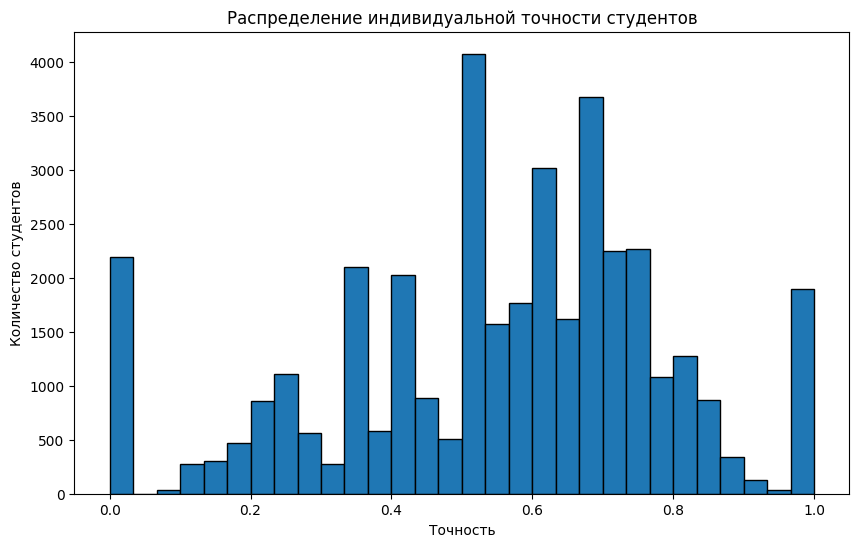

In [155]:
# Визуализация распределения индивидуальной точности среди студентов
plt.figure(figsize=(10, 6))
plt.hist(individual_accuracy, bins=30, edgecolor='black')
plt.title("Распределение индивидуальной точности студентов")
plt.xlabel("Точность")
plt.ylabel("Количество студентов")
plt.show()

На гистограмме представлено распределение индивидуальной точности студентов. Большая часть студентов имеет точность ответов в диапазоне от 50% до 80%, с меньшим количеством студентов, достигающих или приближающихся к 100% точности.

Для анализа связи времени, затраченного на вопрос, и точности ответов, рассмотрим поле 'prior_question_elapsed_time'

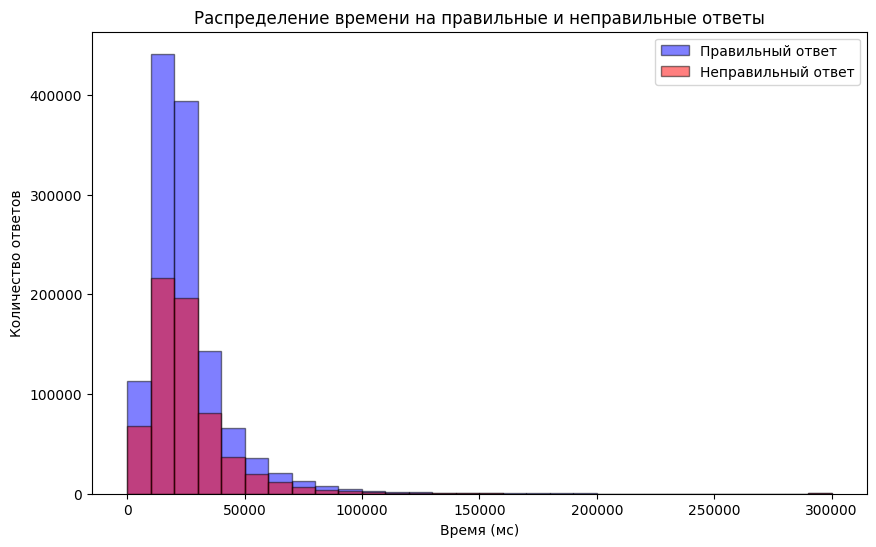

(25394.93461380041, 25719.849789928907)

In [212]:
# Разделим данные на группы по точности ответа и вычислим среднее время для каждой группы
average_time_correct = data_questions[data_questions['answered_correctly'] == 1]['prior_question_elapsed_time'].mean()
average_time_incorrect = data_questions[data_questions['answered_correctly'] == 0]['prior_question_elapsed_time'].mean()

# Визуализируем распределение времени на правильные и неправильные ответы
plt.figure(figsize=(10, 6))
plt.hist(data_questions[data_questions['answered_correctly'] == 1]['prior_question_elapsed_time'], 
         bins=30, alpha=0.5, label='Правильный ответ', color='blue', edgecolor='black')
plt.hist(data_questions[data_questions['answered_correctly'] == 0]['prior_question_elapsed_time'], 
         bins=30, alpha=0.5, label='Неправильный ответ', color='red', edgecolor='black')
plt.title("Распределение времени на правильные и неправильные ответы")
plt.xlabel("Время (мс)")
plt.ylabel("Количество ответов")
plt.legend()
plt.show()

average_time_correct, average_time_incorrect

Среднее время, затраченное на вопросы, на правильные ответы: примерно 25,394 мс.

Среднее время на неправильные ответы: примерно 25,719 мс.

Разница между средним временем на правильные и неправильные ответы небольшая, что может свидетельствовать о том, что время, потраченное на вопрос, не является сильным фактором для предсказания правильности ответа.

Анализ влияния наличия объяснения на точность ответа

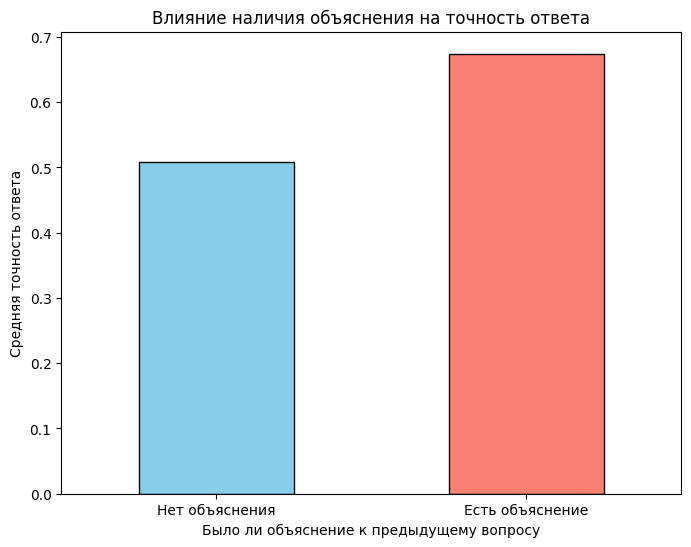

prior_question_had_explanation
False    0.507979
True     0.674255
Name: answered_correctly, dtype: float64

In [158]:
# Группируем данные по полю 'prior_question_had_explanation' и рассчитываем среднюю точность
explanation_accuracy = data_questions.groupby('prior_question_had_explanation')['answered_correctly'].mean()

# Визуализация точности ответов в зависимости от наличия объяснения
plt.figure(figsize=(8, 6))
explanation_accuracy.plot(kind='bar', color=['skyblue', 'salmon'], edgecolor='black')
plt.title("Влияние наличия объяснения на точность ответа")
plt.xlabel("Было ли объяснение к предыдущему вопросу")
plt.ylabel("Средняя точность ответа")
plt.xticks([0, 1], labels=['Нет объяснения', 'Есть объяснение'], rotation=0)
plt.show()

explanation_accuracy

Проанализируем влияние наличия объяснения на точность ответов
* Без объяснения: Средняя точность составляет примерно 51%.
* С объяснением: Средняя точность возрастает до 67%.

Наличие объяснения к предыдущему вопросу заметно повышает вероятность правильного ответа на следующий вопрос. Это свидетельствует о том, что объяснения положительно влияют на понимание и успеваемость студентов.

Анализ успеваемости по разделам

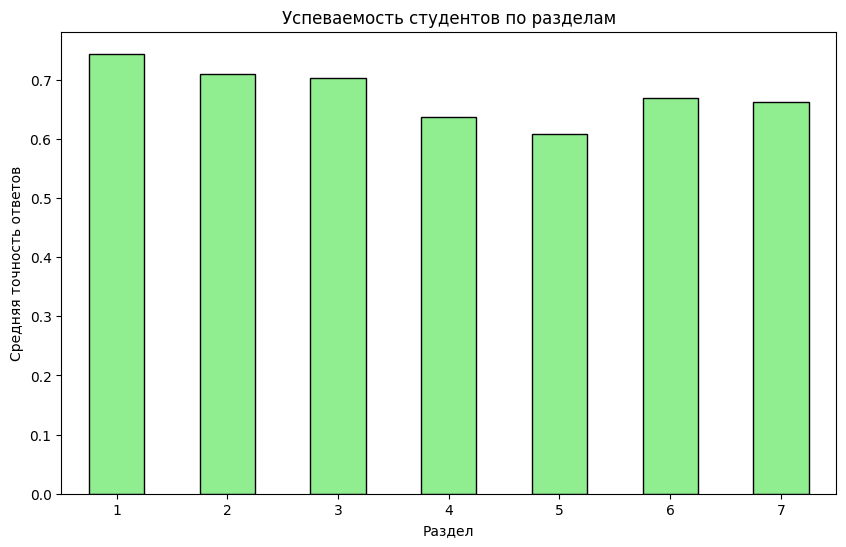

part
1    0.744244
2    0.710568
3    0.703777
4    0.636947
5    0.609141
6    0.669278
7    0.663264
Name: answered_correctly, dtype: float64

In [160]:
# Группируем данные по столбцу 'part' и рассчитываем среднюю точность для каждого раздела
part_accuracy = data_questions.groupby('part')['answered_correctly'].mean()

# Визуализация средней точности ответов по разделам
plt.figure(figsize=(10, 6))
part_accuracy.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title("Успеваемость студентов по разделам")
plt.xlabel("Раздел")
plt.ylabel("Средняя точность ответов")
plt.xticks(rotation=0)
plt.show()

part_accuracy

Проанализируем успеваемость по разделам:
* Раздел 1 показывает наивысшую точность ответов — примерно 74%.
* Раздел 2 и Раздел 3 также имеют высокий уровень успеваемости, с точностью 71% и 70% соответственно.
* Самый низкий уровень успеваемости наблюдается в Разделе 5, где средняя точность составляет около 60%.
* Разделы 4, 6, и 7 имеют уровень точности между 63% и 66%.

Эти результаты показывают, что сложность или понимание учебного материала может различаться в зависимости от раздела.

Анализ по времени выполнения на точность ответа с дополнительными категориями

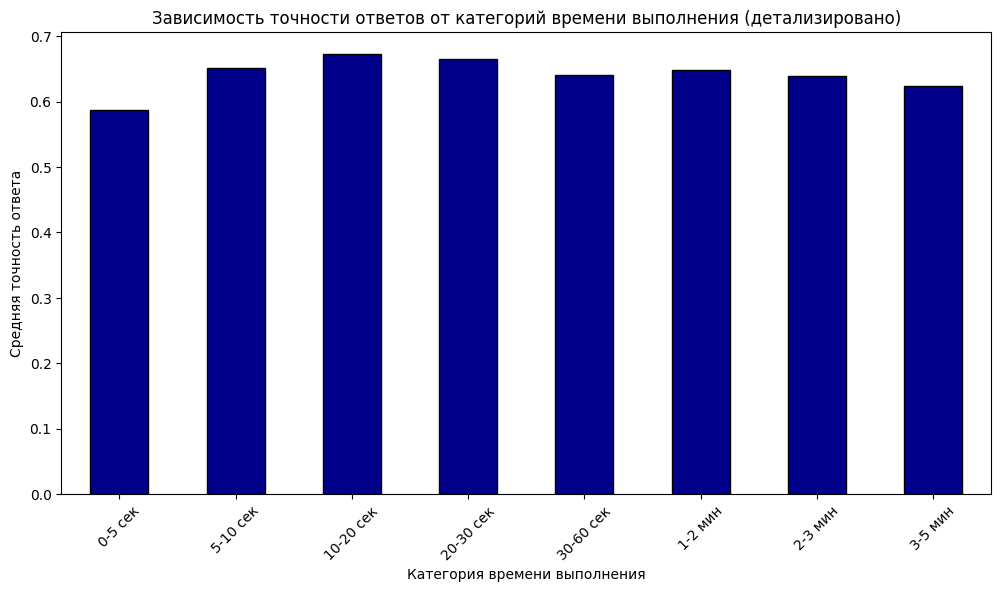

elapsed_time_category
0-5 сек      0.586858
5-10 сек     0.650893
10-20 сек    0.672686
20-30 сек    0.664448
30-60 сек    0.640546
1-2 мин      0.648635
2-3 мин      0.638527
3-5 мин      0.623755
Name: answered_correctly, dtype: float64

In [213]:
# Создаем категории времени выполнения для более детализированного анализа
data_questions['elapsed_time_category'] = pd.cut(data_questions['prior_question_elapsed_time'],
                                                     bins=[0, 5000, 10000, 20000, 30000, 60000, 120000, 180000, 300000],
                                                     labels=['0-5 сек', '5-10 сек', '10-20 сек', '20-30 сек', '30-60 сек', '1-2 мин', '2-3 мин', '3-5 мин'])

# Группируем данные по этим категориям и вычисляем среднюю точность ответов для каждой
time_category_accuracy_detailed = data_questions.groupby('elapsed_time_category')['answered_correctly'].mean()

# Визуализация зависимости точности ответа от категорий времени выполнения
plt.figure(figsize=(12, 6))
time_category_accuracy_detailed.plot(kind='bar', color='darkblue', edgecolor='black')
plt.title("Зависимость точности ответов от категорий времени выполнения (детализировано)")
plt.xlabel("Категория времени выполнения")
plt.ylabel("Средняя точность ответа")
plt.xticks(rotation=45)
plt.show()

time_category_accuracy_detailed


Проанализируем зависимость точности ответов от времени выполнения:
1) Оптимальные интервалы времени: Студенты показывают наибольшую точность при времени выполнения в диапазонах 10-20 секунд (67%) и 5-10 секунд (65%).
2) Уменьшение точности при длительном времени: При времени выполнения более 3 минут средняя точность заметно снижается до 60%.
3) Очень короткие интервалы (0-5 секунд) также характеризуются низкой точностью (58%), что может указывать на спешку или недостаточную подготовку к ответу.

Эти данные свидетельствуют, что промежуточные интервалы времени, в частности от 5 до 30 секунд, связаны с более высокой точностью, что, возможно, обусловлено более обдуманными ответами.

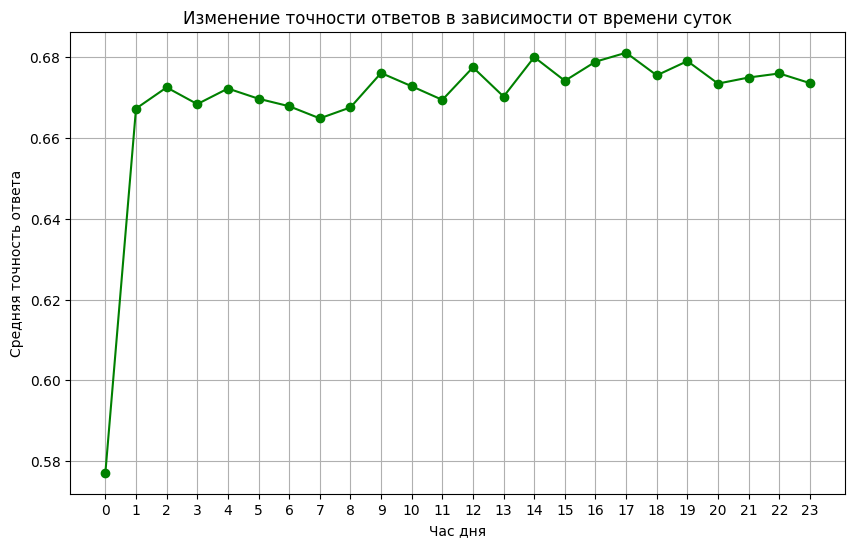

In [162]:
# Преобразуем временные метки (timestamp) в формат datetime для анализа изменения точности со временем
data_questions['timestamp'] = pd.to_datetime(data_questions['timestamp'])

# Добавим столбцы для анализа по дате и времени: день, месяц, час
data_questions['day'] = data_questions['timestamp'].dt.day
data_questions['month'] = data_questions['timestamp'].dt.month
data_questions['hour'] = data_questions['timestamp'].dt.hour

# Рассчитаем среднюю точность по каждому часу, чтобы понять суточные колебания
hourly_accuracy = data_questions.groupby('hour')['answered_correctly'].mean()

# Визуализация изменения точности по часам
plt.figure(figsize=(10, 6))
hourly_accuracy.plot(kind='line', marker='o', color='green')
plt.title("Изменение точности ответов в зависимости от времени суток")
plt.xlabel("Час дня")
plt.ylabel("Средняя точность ответа")
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()

Анализ точности ответов по времени суток показал следующие результаты:
1) Минимальная точность наблюдается около полуночи (00:00), когда точность составляет около 57.86%. Это может быть связано с утомлением студентов.
2) Увеличение точности происходит в утренние часы (с 9:00 до 12:00) и достигает своего пика около 14:00 и 19:00, где точность составляет примерно 68-68.04%.
3) Стабильная точность в течение дня, начиная с 8:00 и до 23:00, когда показатели остаются в пределах 67-68%.

Эти данные показывают, что точность ответов выше в течение дня и достигает пиков в ранний вечер.

Анализ успеваемости по индивидуальным особенностям студентов

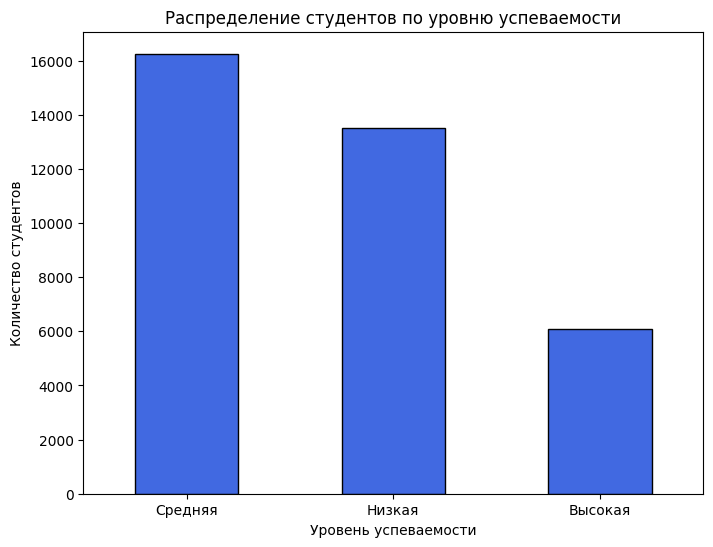

Средняя    16258
Низкая     13517
Высокая     6099
Name: answered_correctly, dtype: int64

In [163]:
# Рассчитаем среднюю точность ответов для каждого студента (user_id), чтобы выявить студентов с разной успеваемостью
# Средняя точность по каждому пользователю
user_accuracy = data_questions.groupby('user_id')['answered_correctly'].mean()

# Определяем категории по успеваемости для классификации пользователей:
# Высокая успеваемость (> 75%), средняя (50-75%), и низкая (< 50%)
user_accuracy_category = pd.cut(user_accuracy, bins=[0, 0.5, 0.75, 1.0], labels=['Низкая', 'Средняя', 'Высокая'])

# Подсчитываем количество пользователей в каждой категории
user_accuracy_distribution = user_accuracy_category.value_counts()

# Визуализация распределения студентов по уровням успеваемости
plt.figure(figsize=(8, 6))
user_accuracy_distribution.plot(kind='bar', color='royalblue', edgecolor='black')
plt.title("Распределение студентов по уровню успеваемости")
plt.xlabel("Уровень успеваемости")
plt.ylabel("Количество студентов")
plt.xticks(rotation=0)
plt.show()

user_accuracy_distribution

Распределение студентов по уровню успеваемости показало следующие результаты:

Средняя успеваемость (точность 50-75%): 16 258 студентов.
Низкая успеваемость (точность ниже 50%): 13 517 студентов.
Высокая успеваемость (точность выше 75%): 6 099 студентов.

Эти данные показывают, что большинство студентов имеют либо средний, либо низкий уровень точности. Это может свидетельствовать о сложностях в учебном материале или отсутствии достаточной подготовки у студентов.

Анализ успеваемости по показателям, связанным с вопросами

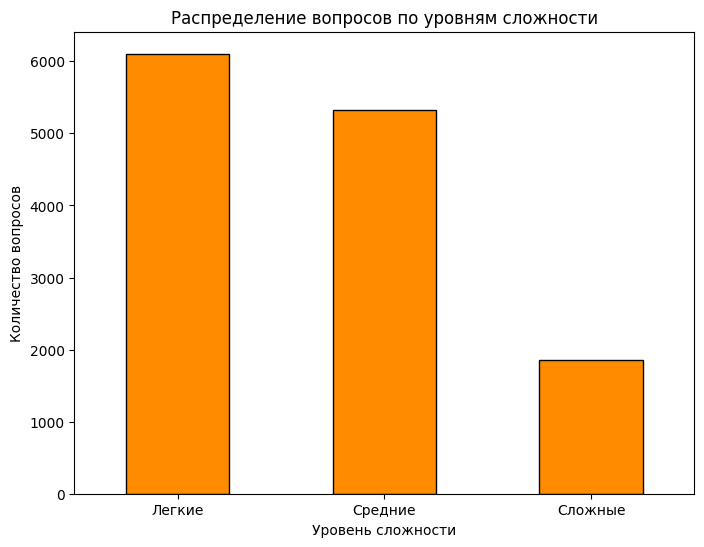

Легкие     6105
Средние    5330
Сложные    1857
Name: answered_correctly, dtype: int64

In [164]:
# Рассчитаем среднюю точность для каждого вопроса (question_id)
question_accuracy = data_questions.groupby('question_id')['answered_correctly'].mean()

# Определим диапазоны точности вопросов, чтобы выделить легкие, средние и сложные вопросы
# Легкие (> 75%), средние (50-75%), и сложные (< 50%)
question_difficulty_category = pd.cut(question_accuracy, bins=[0, 0.5, 0.75, 1.0], labels=['Сложные', 'Средние', 'Легкие'])

# Подсчитаем количество вопросов в каждой категории
question_difficulty_distribution = question_difficulty_category.value_counts()

# Визуализация распределения вопросов по уровням сложности
plt.figure(figsize=(8, 6))
question_difficulty_distribution.plot(kind='bar', color='darkorange', edgecolor='black')
plt.title("Распределение вопросов по уровням сложности")
plt.xlabel("Уровень сложности")
plt.ylabel("Количество вопросов")
plt.xticks(rotation=0)
plt.show()

question_difficulty_distribution

Выводы по анализу распредления вопросов по уровню сложности:
1) Наибольшее количество вопросов — 6,105 — относится к категории легких. Это говорит о том, что значительная часть тестового материала разработана с низким уровнем сложности, вероятно, для проверки базового уровня знаний студентов.
2) Вторая по количеству категория — 5,330 вопросов средней сложности. Эти вопросы предназначены для проверки знаний, которые требуют чуть более глубокого понимания материала, чем легкие вопросы.
3) Количество сложных вопросов значительно меньше — всего 1,857. Это указывает на более ограниченное число вопросов, предназначенных для студентов с высоким уровнем подготовки или для проверки более глубоких знаний. Небольшое количество сложных вопросов может быть обусловлено их предназначением для выявления лучших студентов или более глубокого понимания материала.

Построим матрицу корреляции признаков

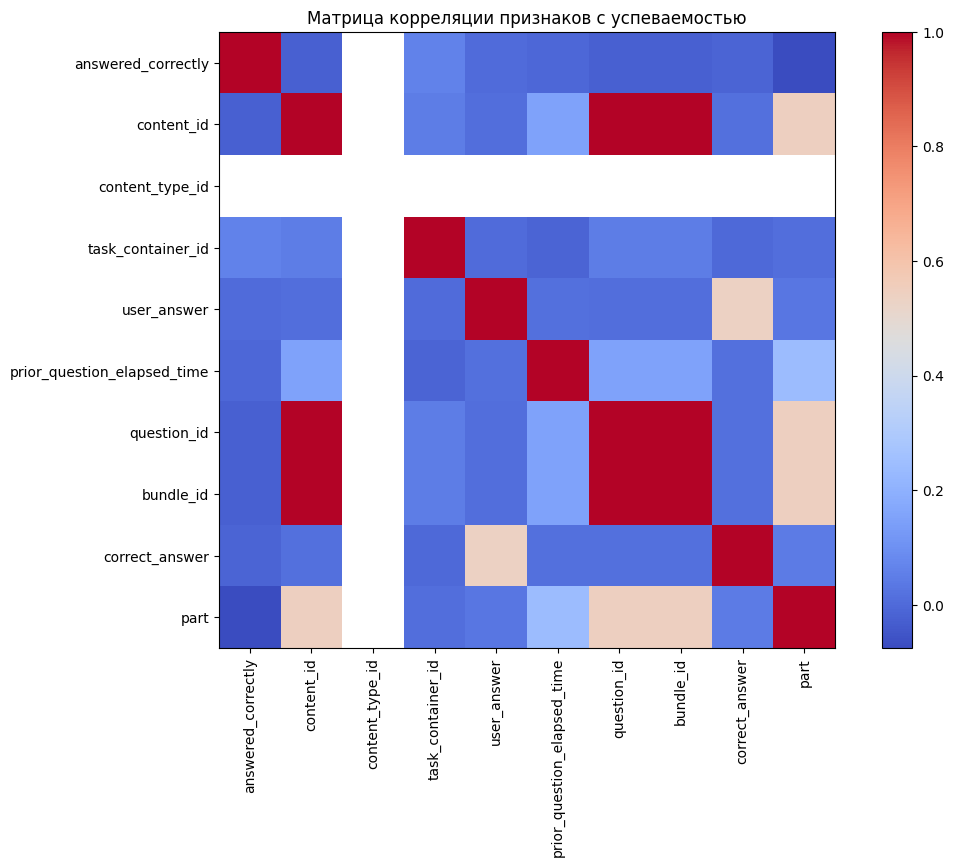

answered_correctly             1.000000
task_container_id              0.062660
user_answer                    0.003939
prior_question_elapsed_time   -0.007706
correct_answer                -0.015468
content_id                    -0.022461
question_id                   -0.022461
bundle_id                     -0.022463
part                          -0.075593
content_type_id                     NaN
Name: answered_correctly, dtype: float64

In [165]:
# Отбираем числовые столбцы, которые могут иметь взаимосвязь с точностью ответов
numeric_features = data_questions[['answered_correctly', 'content_id', 'content_type_id', 
                         'task_container_id', 'user_answer', 'prior_question_elapsed_time', 
                         'question_id', 'bundle_id', 'correct_answer', 'part']]

# Рассчитываем матрицу корреляции
correlation_matrix = numeric_features.corr()

# Визуализируем матрицу корреляции
plt.figure(figsize=(12, 8))
plt.title("Матрица корреляции признаков с успеваемостью")
heatmap = plt.imshow(correlation_matrix, cmap="coolwarm", interpolation="nearest")
plt.colorbar(heatmap)
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.show()

correlation_matrix['answered_correctly'].sort_values(ascending=False)

Анализ матрицы корреляции показал следующие взаимосвязи между признаками и успеваемостью:

task_container_id имеет слабую положительную корреляцию с точностью ответов (0.062), что может указывать на незначительное влияние последовательности задач.

user_answer также показывает слабую положительную корреляцию (0.0039), что, возможно, связано с некоторыми типами вопросов, требующими конкретных ответов.

prior_question_elapsed_time и correct_answer имеют слабую отрицательную корреляцию с точностью ответов (-0.0077 и -0.015 соответственно).

part показывает слабую отрицательную корреляцию (-0.075), что может свидетельствовать о том, что некоторые разделы труднее других.

Признак content_type_id не показал корреляции с успеваемостью (NaN), вероятно, из-за отсутствия достаточного разнообразия значений в данном поле.

Эти данные показывают, что большинство признаков имеет слабое влияние на точность.

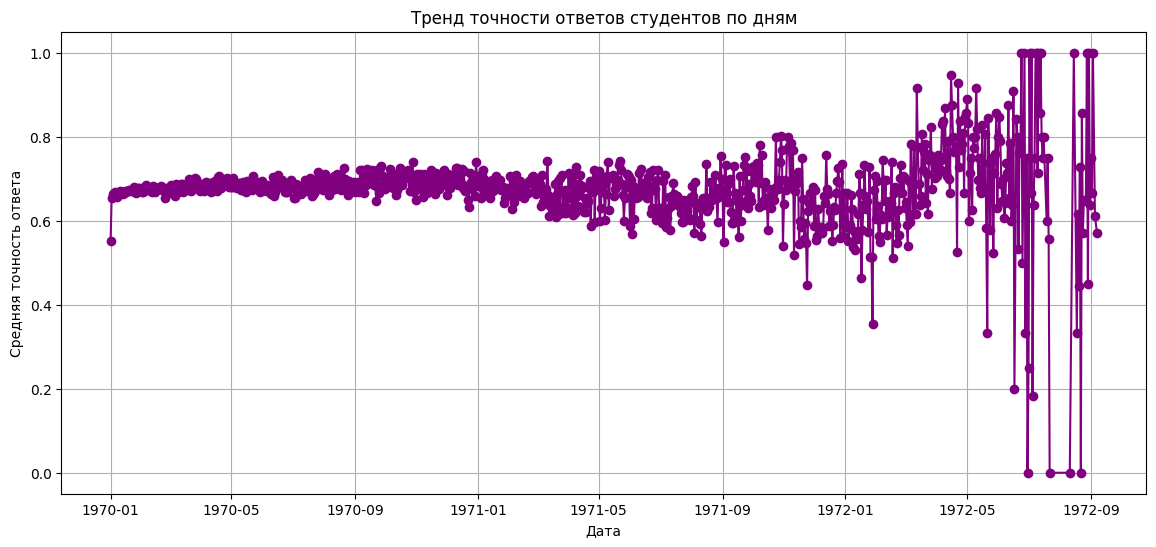

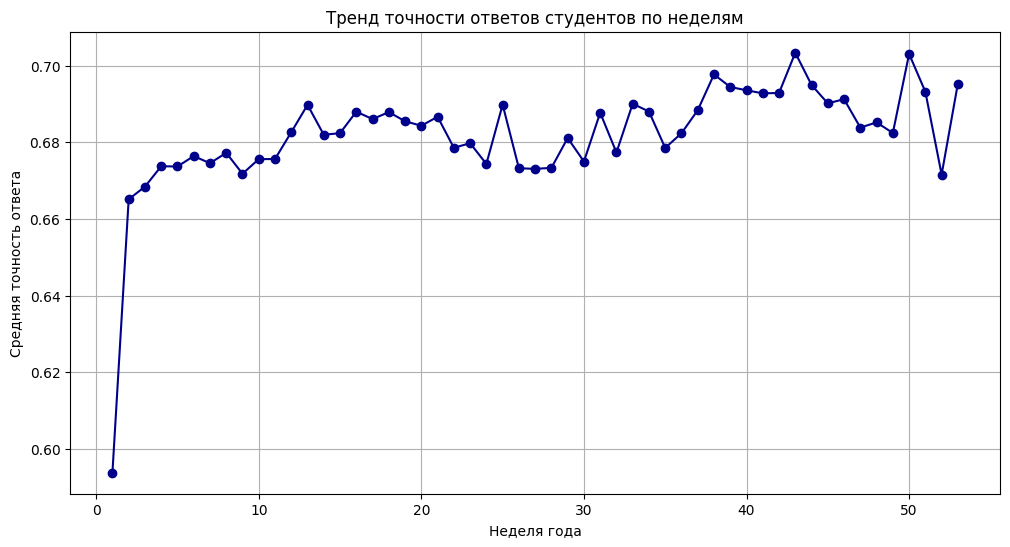

In [169]:
# Добавляем новые столбцы для анализа: день и неделя
data_questions['day'] = data_questions['timestamp'].dt.date 
data_questions['week'] = data_questions['timestamp'].dt.isocalendar().week 

# Рассчитаем среднюю точность по дням, чтобы выявить тренды успеваемости по времени
daily_accuracy = data_questions.groupby('day')['answered_correctly'].mean()

# Визуализация изменения точности по дням
plt.figure(figsize=(14, 6))
daily_accuracy.plot(kind='line', marker='o', color='purple')
plt.title("Тренд точности ответов студентов по дням")
plt.xlabel("Дата")
plt.ylabel("Средняя точность ответа")
plt.grid(True)
plt.show()

# Рассчитаем среднюю точность по неделям для анализа долгосрочного тренда
weekly_accuracy = data_questions.groupby('week')['answered_correctly'].mean()

# Визуализация изменения точности по неделям
plt.figure(figsize=(12, 6))
weekly_accuracy.plot(kind='line', marker='o', color='darkblue')
plt.title("Тренд точности ответов студентов по неделям")
plt.xlabel("Неделя года")
plt.ylabel("Средняя точность ответа")
plt.grid(True)
plt.show()


In [170]:
daily_accuracy.head(), weekly_accuracy.head()

(day
 1970-01-01    0.551388
 1970-01-02    0.653149
 1970-01-03    0.664783
 1970-01-04    0.664887
 1970-01-05    0.668503
 Name: answered_correctly, dtype: float64,
 week
 1    0.593780
 2    0.665129
 3    0.668420
 4    0.673749
 5    0.673685
 Name: answered_correctly, dtype: float64)

Сделаем выводы из графиков выше:

Тренд по дням показывает постепенное увеличение точности в первые несколько дней, начиная с 55% 1 января и поднимаясь до 67% к 5 января. Это может отражать адаптацию студентов к материалу.

Тренд по неделям также демонстрирует рост: начальная точность в 1-ю неделю составляет 59%, затем увеличивается до 67% к 4-й неделе, что указывает на возможное улучшение навыков и усвоение материала с течением времени.

Эти тренды могут говорить о прогрессе в учебе студентов и возможной адаптации к заданиям.

В завершениии анализа данной части проанализируем прогресс студентов по разделам (part) во времени

<Figure size 1400x800 with 0 Axes>

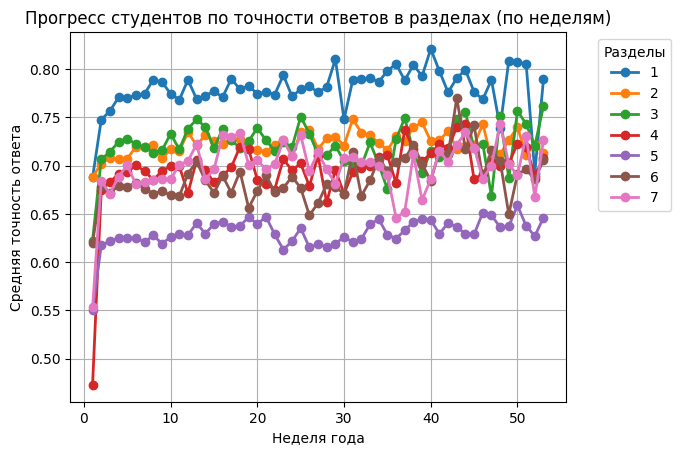

part,1,2,3,4,5,6,7
week,,,,,,,
1,0.687710,0.688228,0.622293,0.472624,0.550082,0.620003,0.553063
2,0.747543,0.702020,0.706505,0.674574,0.617301,0.677943,0.683654
3,0.756586,0.708188,0.714203,0.682908,0.621632,0.671659,0.671000
4,0.770743,0.706483,0.724691,0.691346,0.625123,0.678980,0.688612
5,0.769990,0.707146,0.727968,0.692909,0.624662,0.678264,0.700348


In [171]:
# Рассчитаем среднюю точность ответов по разделам и по неделям для анализа прогресса
weekly_part_accuracy = data_questions.groupby(['week', 'part'])['answered_correctly'].mean().unstack()

# Визуализируем прогресс студентов по разделам на основе еженедельной точности
plt.figure(figsize=(14, 8))
weekly_part_accuracy.plot(marker='o', linewidth=2)
plt.title("Прогресс студентов по точности ответов в разделах (по неделям)")
plt.xlabel("Неделя года")
plt.ylabel("Средняя точность ответа")
plt.legend(title="Разделы", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

weekly_part_accuracy.head()

Выводы по анализу прогресса студентов по точности ответов в разделах:

* Общий рост точности по разделам: Почти во всех разделах наблюдается положительный тренд на протяжении первых пяти недель, что свидетельствует об улучшении успеваемости студентов.
* Сложные разделы: Разделы 4 и 5 демонстрируют более низкие значения точности в сравнении с другими разделами, особенно в первую неделю. Однако и в этих разделах виден прогресс со временем.
* Стабильные разделы: Разделы 1, 2, и 3 демонстрируют стабильные высокие значения точности и устойчивый рост, что может говорить о лучшем понимании материала или его относительной легкости.

Этот анализ подтверждает, что студенты адаптируются к учебным материалам, и сложные разделы со временем становятся легче.

## Анализ data_lectures

Изучим влияние времени, затраченного на лекции, на успеваемость студентов

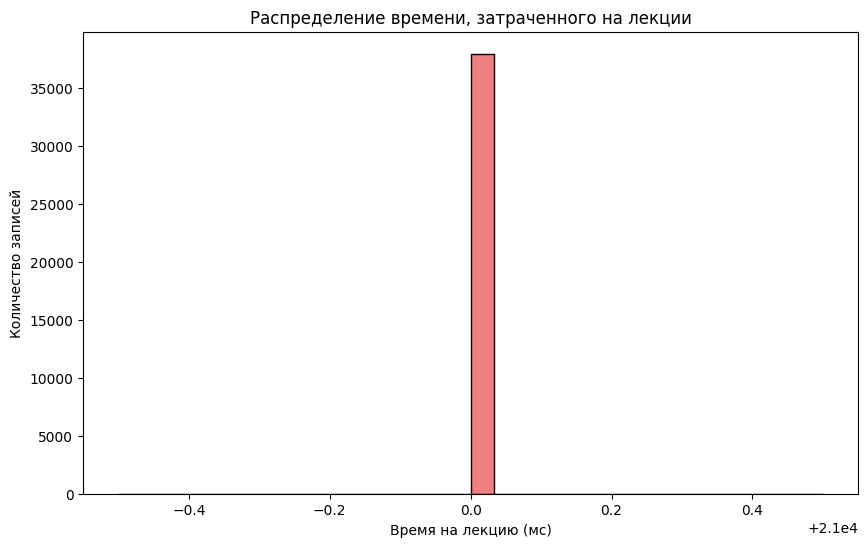

21000.0

In [214]:
# Проверим распределение времени на лекции с использованием столбца 'prior_question_elapsed_time'
# Это время указывает, сколько времени студенты тратили на предыдущие вопросы или лекции

# Визуализируем распределение времени на лекции (prior_question_elapsed_time)
plt.figure(figsize=(10, 6))
plt.hist(data_lectures['prior_question_elapsed_time'], bins=30, color='lightcoral', edgecolor='black')
plt.title("Распределение времени, затраченного на лекции")
plt.xlabel("Время на лекцию (мс)")
plt.ylabel("Количество записей")
plt.show()

# Рассчитаем среднее время, затраченное на лекции
mean_time = data_lectures['prior_question_elapsed_time'].mean()

mean_time

Среднее время на лекцию константно и составляет 21,000 мс, такой результат свидетельствует о том, что студенты тратят фиксированное время на лекции, что может быть задано системой или предполагает единое время на разные темы.

Анализируем влияние времени и наличия объяснений на усвоение материала

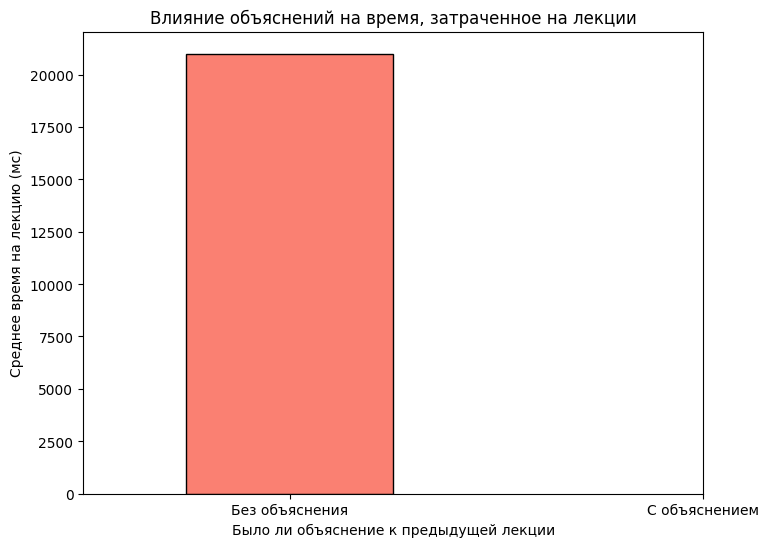

prior_question_had_explanation
False    21000.0
Name: prior_question_elapsed_time, dtype: float64

In [216]:
# Группируем данные по наличию объяснения и рассчитываем среднее время, затраченное на лекцию
explanation_time_analysis = data_lectures.groupby('prior_question_had_explanation')['prior_question_elapsed_time'].mean()

# Визуализируем среднее время на лекцию в зависимости от наличия объяснения
plt.figure(figsize=(8, 6))
explanation_time_analysis.plot(kind='bar', color=['salmon', 'skyblue'], edgecolor='black')
plt.title("Влияние объяснений на время, затраченное на лекции")
plt.xlabel("Было ли объяснение к предыдущей лекции")
plt.ylabel("Среднее время на лекцию (мс)")
plt.xticks([0, 1], labels=['Без объяснения', 'С объяснением'], rotation=0)
plt.show()

explanation_time_analysis

Анализ показал, что время, затраченное на лекции, составляет 21,000 мс (или 21 секунду) в случаях, когда объяснения к предыдущим вопросам отсутствуют. Данные по времени с объяснениями отсутствуют, что может указывать на отсутствие лекций с объяснением в этом наборе данных.

Проведем анализ по меткам (tags) для лекций

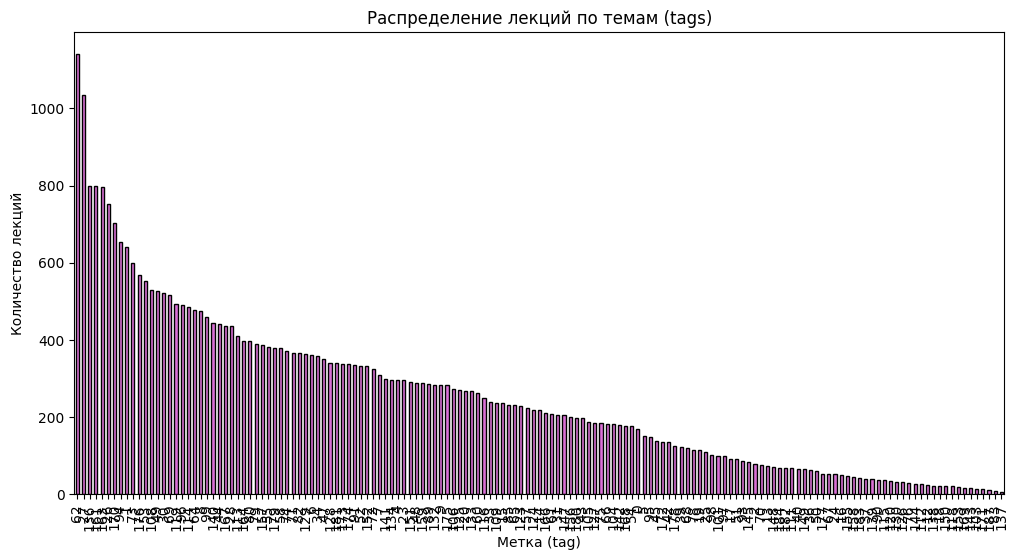

62     1141
27     1035
136     800
161     798
163     796
26      752
170     704
94      653
1       640
73      598
Name: tag, dtype: int64

In [177]:
# Рассчитаем количество записей по каждой метке (tag) для анализа популярности или частоты лекций по темам
tag_distribution = data_lectures['tag'].value_counts()

# Визуализируем распределение меток (tags) для лекций
plt.figure(figsize=(12, 6))
tag_distribution.plot(kind='bar', color='orchid', edgecolor='black')
plt.title("Распределение лекций по темам (tags)")
plt.xlabel("Метка (tag)")
plt.ylabel("Количество лекций")
plt.show()


tag_distribution.head(10)  # показываем первые 10 популярных меток для быстрого просмотра

Анализ меток для лекций показал следующие результаты:
1) Метки 62 и 27 являются самыми частыми, с количеством лекций 1,141 и 1,035 соответственно.
2) Другие распространенные метки включают 136, 161, 163, 26, и 170, каждая из которых насчитывает от 700 до 800 лекций.

Частое использование определенных меток указывает на высокий интерес к этим темам или их важность в учебном материале.

Анализируем распределение лекций по типу (type_of)

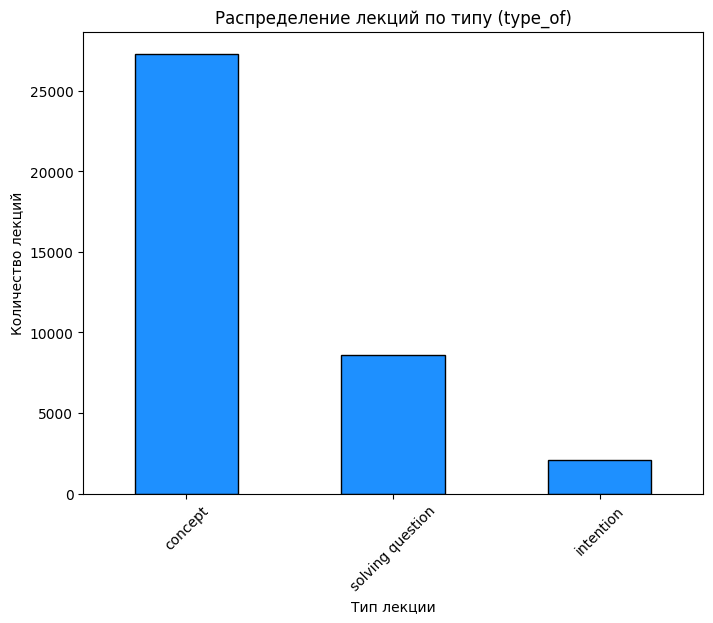

concept             27308
solving question     8602
intention            2067
Name: type_of, dtype: int64

In [178]:
# Рассчитаем количество записей для каждого типа лекции
type_of_distribution = data_lectures['type_of'].value_counts()

# Визуализируем распределение лекций по типу
plt.figure(figsize=(8, 6))
type_of_distribution.plot(kind='bar', color='dodgerblue', edgecolor='black')
plt.title("Распределение лекций по типу (type_of)")
plt.xlabel("Тип лекции")
plt.ylabel("Количество лекций")
plt.xticks(rotation=45)
plt.show()

type_of_distribution

Выводы по анализу распределения лекций по типам (type_of):
1) Тип "concept" — самый распространенный, с 27,308 лекциями. Это может указывать на значительный акцент на концептуальном обучении.
2) Тип "solving question" — включает 8,602 лекции, что показывает внимание к практическим задачам и их решению.
3) Тип "intention" — наименее частый, всего 2,067 лекций, что, возможно, связано с объяснением целей или мотивов учебных материалов.

Проведем анализ распределения лекций по разделам (part), чтобы определить, какие части учебного материала освещены больше всего

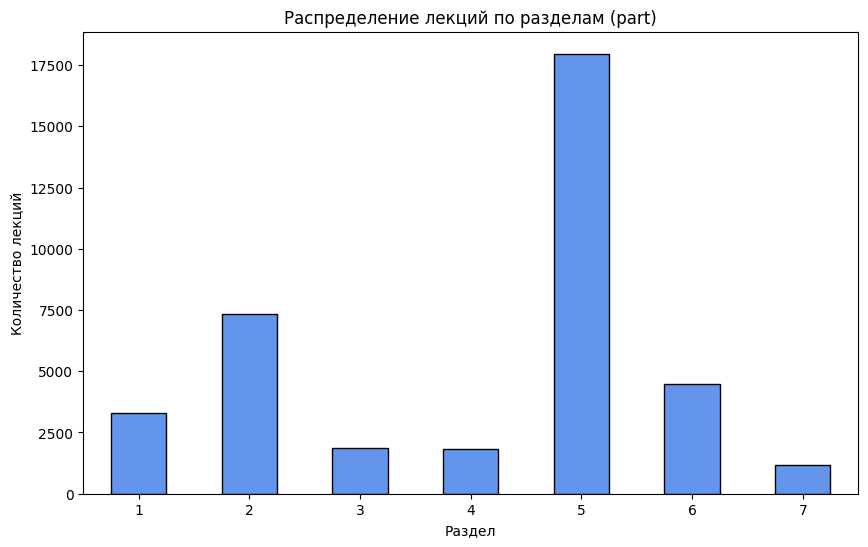

5    17965
2     7353
6     4464
1     3303
3     1884
4     1842
7     1166
Name: part, dtype: int64

In [182]:
# Рассчитаем количество лекций по каждому разделу
part_distribution = data_lectures['part'].value_counts().sort_index()

# Визуализируем распределение лекций по разделам
plt.figure(figsize=(10, 6))
part_distribution.plot(kind='bar', color='cornflowerblue', edgecolor='black')
plt.title("Распределение лекций по разделам (part)")
plt.xlabel("Раздел")
plt.ylabel("Количество лекций")
plt.xticks(rotation=0)
plt.show()

part_distribution.sort_values(ascending=False)

Выводы по анализу распределения лекций по разделам:

Раздел 5 имеет наибольшее количество лекций — 17,965, что может свидетельствовать о его важности или сложности.
Разделы 2 и 6 также имеют значительное количество лекций, 7,353 и 4,464 соответственно.
Разделы 1, 3, 4 и 7 содержат меньше лекций, причем.
Раздел 7 имеет минимальное количество — 1,166.

## Выводы

### Обобщенные выводы по анализу успеваемости студентов:

1. **Общая успеваемость**:
   - Средняя точность по всем студентам составляет около 65%. При этом успеваемость распределяется по трём категориям: большинство студентов имеют средний уровень (50-75%), значительная часть — низкий уровень (менее 50%), а меньшая часть — высокий уровень (более 75%).

2. **Разделы и их сложность**:
   - Разделы с более высоким уровнем успеваемости включают 1, 2 и 3, где студенты показывают более высокую точность, чем в других. Разделы 4 и 5 являются более сложными, так как имеют меньшую среднюю точность ответов. Тем не менее, по всем разделам наблюдается положительный прогресс, особенно на протяжении первых недель обучения.

3. **Влияние времени выполнения вопросов**:
   - Промежуточные интервалы времени выполнения (от 5 до 30 секунд) связаны с более высокой точностью, что, вероятно, связано с обдуманностью ответов. Слишком короткое (менее 5 секунд) или слишком длительное (более 3 минут) время выполнения может негативно сказаться на точности.

4. **Тренды успеваемости во времени**:
   - Анализ точности по времени суток показал, что студенты демонстрируют наибольшую точность в течение дня и достигают пика в ранний вечер (14:00 и 19:00). Также отмечается положительный тренд на протяжении нескольких недель, что свидетельствует о прогрессе и адаптации студентов.

5. **Влияние предыдущих объяснений**:
   - Наличие объяснения к предыдущим вопросам положительно влияет на успеваемость. Студенты, которые получают объяснения, показывают более высокую точность на следующих вопросах.

6. **Анализ лекций**:
   - **Типы лекций**: Лекции, ориентированные на концептуальное понимание, составляют наибольшую часть материалов, в то время как "solving question" и "intention" встречаются реже. Это может отражать акцент на теоретической базе, что стоит дополнить практическими заданиями.
   - **Темы и разделы**: Наибольшее внимание уделяется определенным разделам, таким как Раздел 5, что может указывать на его сложность или значимость. Популярные метки (tags) показывают востребованные темы, но также выявляют темы, требующие пересмотра и дополнения.
   - **Продолжительность и вовлеченность**: Время, затраченное на лекции, часто фиксированное, что может ограничивать глубину изучения материала. Время на лекцию в 20–30 секунд указывает на стабильное временное ограничение, что может не всегда соответствовать сложности темы.
